In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
data = pd.read_excel('../data/data.xlsx')
data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'])
data = data.set_index('Unnamed: 0')
data.index.name = None
data.head()

,AAPL,MSFT,NVDA,AMZN,GOOG,META,BRK-B,TSLA,AVGO,WMT,...,SBER,ROSN,BTC-USD,GC%3DF,SI%3DF,PL%3DF,HG%3DF,PA%3DF,CL%3DF,NG%3DF
2016-01-01,23.834379,48.240696,0.789731,31.849501,36.917145,101.740501,130.75,14.894000,10.941828,17.191137,...,1.343893,3.441661,434.334015,1075.099976,13.817,883.200012,2.0705,542.950012,36.759998,2.334
2016-01-02,23.834379,48.240696,0.789731,31.849501,36.917145,101.740501,130.75,14.894000,10.941828,17.191137,...,1.343893,3.441661,433.437988,1075.099976,13.817,883.200012,2.0705,542.950012,36.759998,2.334
2016-01-03,23.834379,48.240696,0.789731,31.849501,36.917145,101.740501,130.75,14.894000,10.941828,17.191137,...,1.343893,3.441661,430.010986,1075.099976,13.817,883.200012,2.0705,542.950012,36.759998,2.334
2016-01-04,23.834379,48.240696,0.789731,31.849501,36.917145,101.740501,130.75,14.894000,10.941828,17.191137,...,1.343893,3.441661,433.091003,1075.099976,13.817,883.200012,2.0705,542.950012,36.759998,2.334
2016-01-05,23.237108,48.460758,0.802417,31.689501,36.953972,102.248108,131.25,14.895333,10.575768,17.599522,...,1.355960,3.471827,431.959991,1078.400024,13.949,888.599976,2.0885,535.099976,35.970001,2.325


In [3]:
pre = data.groupby([data.index.year, data.index.month]).agg(["first", "last"])

data_pct_m = pd.DataFrame(index = data.groupby(data.index.to_period('M')).apply(lambda x: x.index.max()).values
                     , columns = data.columns)
for i in data.columns:
    data_pct_m[i] = ( (pre[i]['last'] - pre[i]['first']) / pre[i]['first'] ).values

print(data_pct_m.shape)
data_pct_m.head()

(72, 200)


,AAPL,MSFT,NVDA,AMZN,GOOG,META,BRK-B,TSLA,AVGO,WMT,...,SBER,ROSN,BTC-USD,GC%3DF,SI%3DF,PL%3DF,HG%3DF,PA%3DF,CL%3DF,NG%3DF
2016-01-31,-0.081791,0.000669,-0.094944,-0.091236,0.009629,0.116513,-0.013155,-0.127046,-0.041632,0.092092,...,-0.053811,0.036291,-0.150960,0.045546,0.034643,-0.014983,-0.007164,-0.078675,-0.121690,-0.057127
2016-02-29,0.008137,-0.063328,0.074207,-0.038778,-0.072114,-0.070988,0.042826,-0.025439,-0.026946,-0.017185,...,0.110019,0.067139,0.173274,0.093980,0.039570,0.074701,0.037533,-0.011962,0.067362,-0.204926
2016-03-31,0.084154,0.050399,0.087939,0.025214,0.036366,0.038973,0.036074,0.233002,0.119783,0.038174,...,0.139653,0.181896,-0.042273,0.003170,0.049345,0.043265,0.018678,0.087809,0.114535,0.124569
2016-04-30,-0.148044,-0.098135,-0.012817,0.115583,-0.073564,0.015940,0.015022,0.014801,-0.075665,-0.028236,...,0.184284,0.211440,0.072634,0.056319,0.179675,0.132795,0.051905,0.115937,0.237836,0.090320
2016-05-31,0.072536,0.059713,0.306836,0.069590,0.056345,0.004821,-0.040158,-0.075474,0.057478,0.058622,...,0.061050,-0.112104,0.175958,-0.060383,-0.097644,-0.095945,-0.074904,-0.124953,0.087245,0.096135


In [4]:
data_pct = data.pct_change().dropna()

pdata = data[:366]
pdata_pct = pdata.pct_change().dropna()
pdata_pct_m = data_pct_m[:12]

In [5]:
import random

In [6]:
#data slicer
indmin = data.groupby(data.index.to_period('M')).apply(lambda x: x.index.min()).values
indmax = data.groupby(data.index.to_period('M')).apply(lambda x: x.index.max()).values

#itg lists with frames
periods = []
cors = []

p_periods = []

for i in range(0, 61):
    #data slicer
    period = data.loc[indmin[i]:indmax[i+11]]
    period_corr = period.corr()
    
    cors.append(period_corr.values.astype(np.float32))
    periods.append(period.values.astype(np.float32))
    
    #choose 10 assets:max corr, 10 assets:min corr, 5 assets:randomly
    abs_corr = period_corr.abs().sum().sort_values()

    asset_labels = []
    asset_labels += abs_corr[:10].index.to_list()
    asset_labels += abs_corr.index[random.sample(range(11, len(data.columns)-10), 5)].to_list()
    asset_labels += abs_corr[-10:].index.to_list()

    p_periods.append(period[asset_labels].values.astype(np.float32))

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaller = MinMaxScaler(feature_range=(-1, 1))

In [8]:
orig_cors = cors[:3]

archimedian_cors = []
for i in [0, 20, 30]:
    archimedian_cors.append(np.loadtxt('intermediate_data/archimedian/archimedian_cors%s.gz' %i, delimiter=','))
    
glasso_prec_cors = []
glasso_itg_cors = []
for i in [0, 20, 30]:
    glasso_prec_cors.append(np.loadtxt('intermediate_data/glasso_cors/glasso_cors%s.gz' %i, delimiter=','))
for i in [0, 20, 30]:
    glasso_itg_cors.append(np.loadtxt('intermediate_data/glasso_cors/glasso_kendall%s.gz' %i, delimiter=','))
    
kpca_min_cor = []
kpca_max_cor = []
for i in [0, 20, 30]:
    kpca_min_cor.append(np.loadtxt('intermediate_data/kpca/X_kcpa_copula_cor_list%s.gz' %i, delimiter=','))
for i in [0, 20, 30]:
    x = np.loadtxt('intermediate_data/kpca/X_kcpa_copula_cor_large_list2%s.gz' %i, delimiter=',')
    x_sc = scaller.fit_transform(x)
    x = np.corrcoef(x_sc)
    kpca_max_cor.append(x)
    
decoded_min_cors = []
decoded_max_cors = []
for i in [0, 20, 30]:
    x = np.loadtxt('intermediate_data/decoder/X_encoded_train_copula_list%s.gz' %i, delimiter=',')
    decoded_min_cors.append(np.corrcoef(x))
for i in [0, 20, 30]:
    x = np.loadtxt('intermediate_data/decoder/X_encoded_train_copula_large_list%s.gz' %i, delimiter=',')
    decoded_max_cors.append(np.corrcoef(x))

In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.patches import Rectangle

In [10]:
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

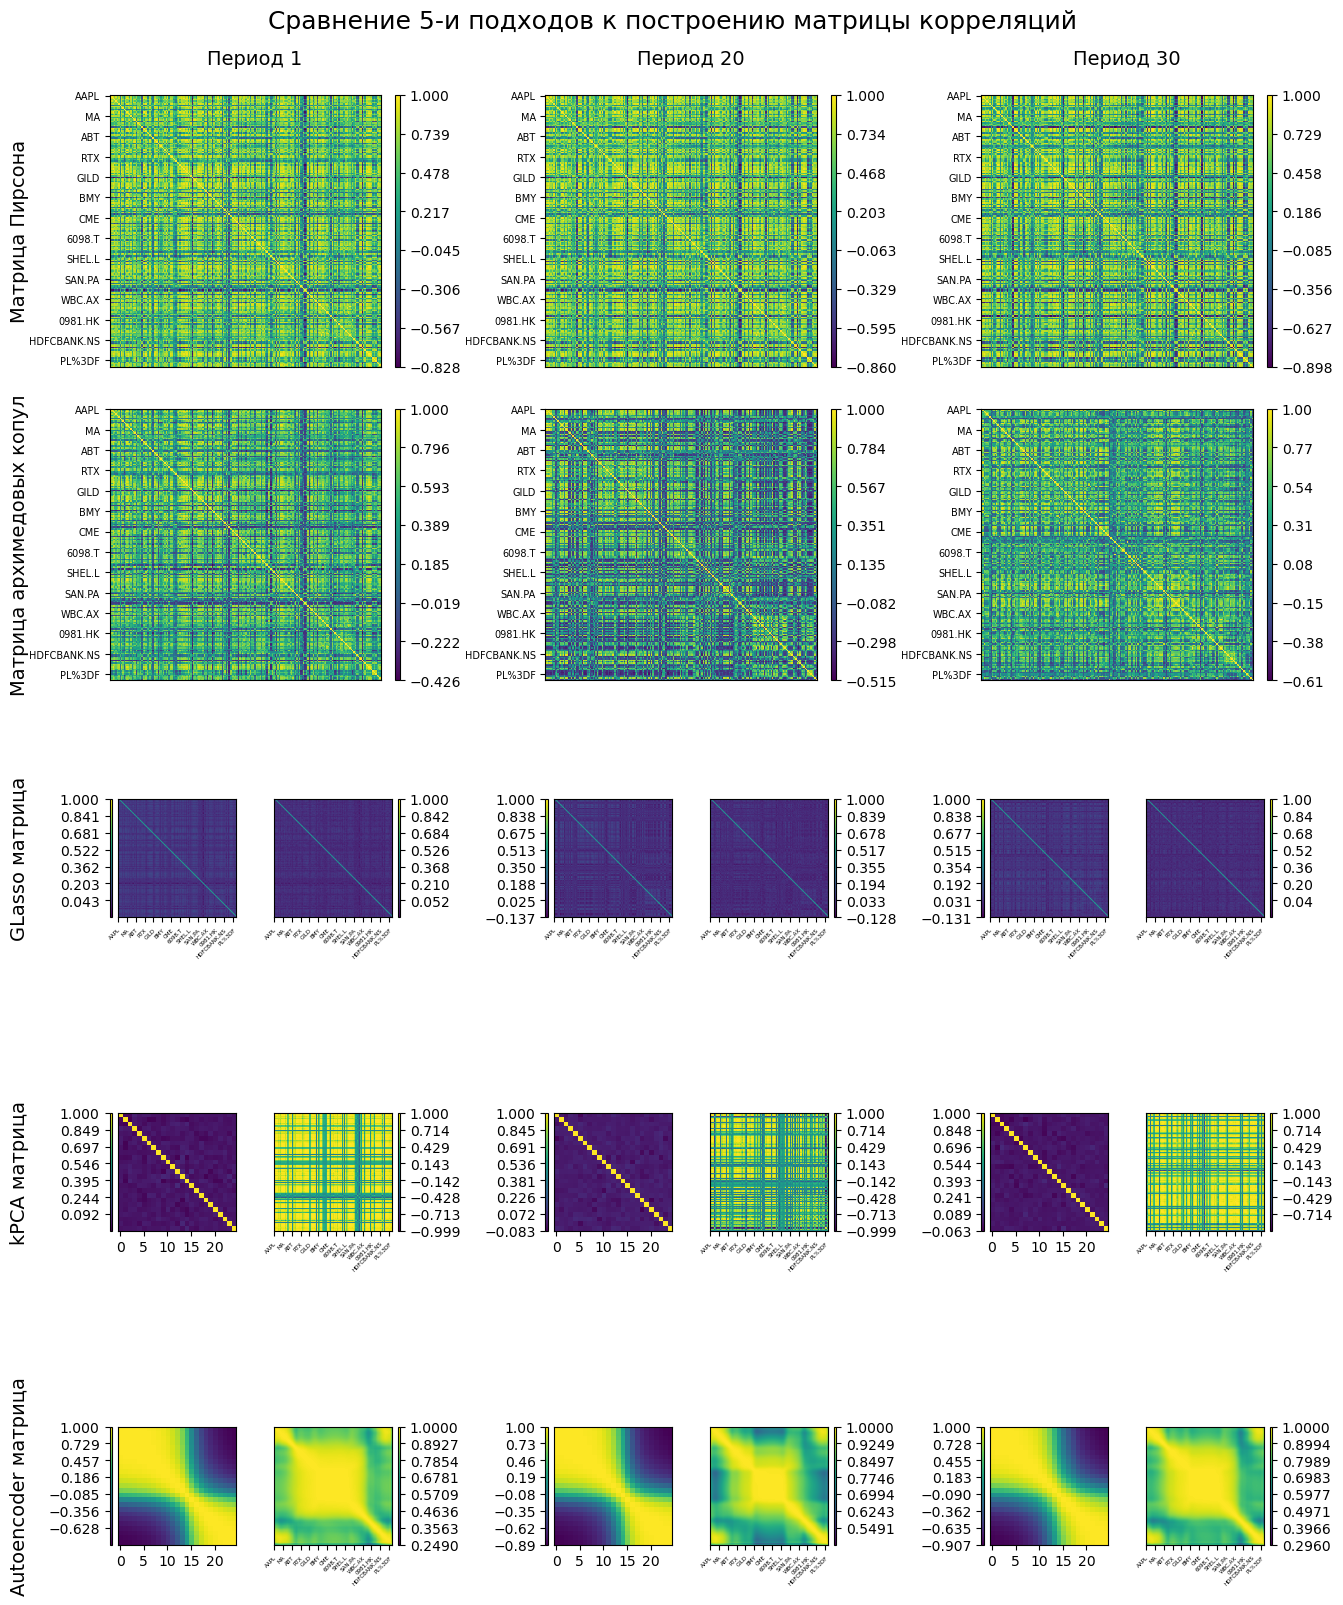

In [12]:
fig = plt.figure(figsize=(15, 20))

grid = gridspec.GridSpec(5, 3, figure=fig, hspace=0.1, wspace=0.5)

list_of_cors = [[glasso_prec_cors, glasso_itg_cors], [kpca_min_cor, kpca_max_cor], [decoded_min_cors, decoded_max_cors]]

for i in range(3):
    #first subplot
    ax = fig.add_subplot(grid[0, i])
    ax.set_xticks([], [])
    ax.set_yticks(range(0, len(orig_cors[i]), 15), labels=data.columns[0::15], fontsize=7)
    im = ax.imshow(orig_cors[i], interpolation='nearest')
    ax_divider = make_axes_locatable(ax)
    cax = ax_divider.append_axes("right", size="2%", pad="5%")
    fig.colorbar(im, cax=cax, ticks=np.linspace(orig_cors[i].max(), orig_cors[i].min(), num=8))
    
    #second subplot
    ax = fig.add_subplot(grid[1, i])
    ax.set_xticks([], [])
    ax.set_yticks(range(0, len(archimedian_cors[i]), 15), labels=data.columns[0::15], fontsize=7)
    im = ax.imshow(archimedian_cors[i], interpolation='nearest')
    ax_divider = make_axes_locatable(ax)
    cax = ax_divider.append_axes("right", size="2%", pad="5%")
    fig.colorbar(im, cax=cax, ticks=np.linspace(archimedian_cors[i].max(), archimedian_cors[i].min(), num=8))



for row in range(5):
    for col in range(3):
        if row >= 2:
            inner_gs = grid[row, col].subgridspec(1, 2, wspace=0.3)
            
            #first subplot
            ax1 = fig.add_subplot(inner_gs[0])
            img1 = ax1.imshow(list_of_cors[row-2][0][col])
            if len(list_of_cors[row-2][0][col]) == 25:
                ax1.set_xticks(range(0, 25, 5), range(0, 25, 5))
            else:
                ax1.set_xticks(range(0, 200, 15), data.columns[0::15],
                          rotation=45, ha="right", rotation_mode="anchor", fontsize=4)
            ax1.set_yticks([], labels=[])
            ax1_divider = make_axes_locatable(ax1)
            cax1 = ax1_divider.append_axes("left", size="2%", pad="5%")
            cbar1 = plt.colorbar(img1, cax=cax1, ticks=np.linspace(round(list_of_cors[row-2][0][col].max(), 3)
                                                      , round(list_of_cors[row-2][0][col].min(), 3)
                                                      , num=8))
            cbar1.ax.yaxis.set_ticks_position('left')
            
            
            #second subplot
            ax2 = fig.add_subplot(inner_gs[1])
            img2 = ax2.imshow(list_of_cors[row-2][1][col])
            #ticks
            if len(list_of_cors[i-2][1][i-2]) == 25:
                ax2.set_xticks(range(0, 25, 5), range(0, 25, 5))
            else:
                ax2.set_xticks(range(0, 200, 15), data.columns[0::15],
                          rotation=45, ha="right", rotation_mode="anchor", fontsize=4)
            ax2.set_yticks([], labels=[])
            
            
            ax2_divider = make_axes_locatable(ax2)
            cax2 = ax2_divider.append_axes("right", size="2%", pad="5%")
            cbar2 = plt.colorbar(img2, cax=cax2, ticks=np.linspace(round(list_of_cors[row-2][1][col].max(), 3)
                                                      , round(list_of_cors[row-2][1][col].min(), 3)
                                                      , num=8))
            cbar2.ax.yaxis.set_ticks_position('right')
            
            
col_titles = ['Период 1', 'Период 20', 'Период 30']
for i in range(3):
    pos = grid[0, i].get_position(fig)
    fig.text(x=pos.x0 + pos.width/2
             , y=pos.y0 + pos.height + 0.015
             , s=col_titles[i]
             , ha='center'
             , va='center'
             , fontsize=14)
row_titles = ['Матрица Пирсона', 'Матрица архимедовых копул', 'GLasso матрица', 'kPCA матрица', 'Autoencoder матрица']
for i in range(5):
    pos = grid[i, 0].get_position(fig)
    fig.text(x=pos.x0 - 0.06
             , y=pos.y0 + pos.height/2
             , s=row_titles[i]
             , ha='center'
             , va='center'
             , fontsize=14
             , rotation=90)

    t = 'Сравнение 5-и подходов к построению матрицы корреляций'
fig.text(0.5, 0.91, t, ha='center', fontsize=18)
    
plt.show()